In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv(r"D:\SQL\csv_files_python\4_top_skills_based_on_salary.csv")

In [3]:
df

,skills,avg_salary,total_job_offerts
0,kafka,129999,40
1,airflow,116387,71
2,scala,115480,59
3,linux,114883,58
4,confluence,114153,62
5,pyspark,114058,49
6,mongodb,113608,52
7,gcp,113065,78
8,spark,113002,187
9,databricks,112881,102


In [4]:
df_top_10 = df.head(10).copy()

In [5]:
df_top_10

,skills,avg_salary,total_job_offerts
0,kafka,129999,40
1,airflow,116387,71
2,scala,115480,59
3,linux,114883,58
4,confluence,114153,62
5,pyspark,114058,49
6,mongodb,113608,52
7,gcp,113065,78
8,spark,113002,187
9,databricks,112881,102


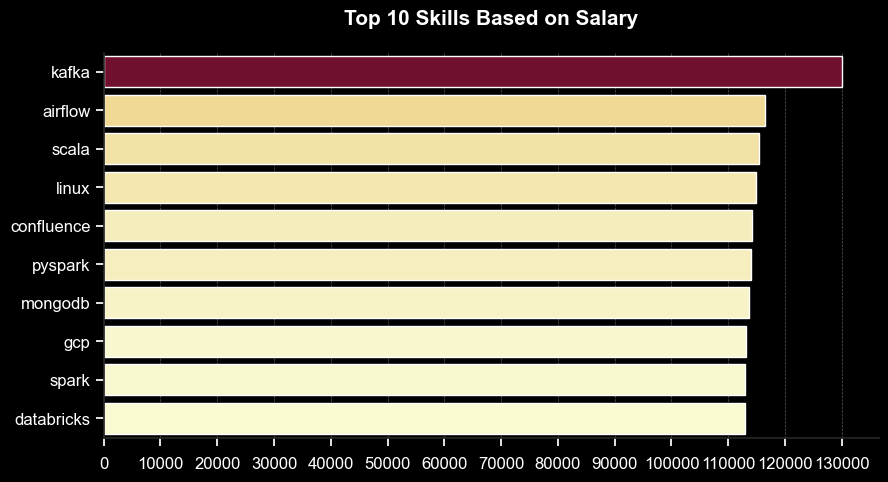

In [6]:
plt.figure(figsize=(10, 5), facecolor="black")

sns.set_theme(style="ticks")
sns.barplot(data=df_top_10, x="avg_salary", y="skills", hue="avg_salary", palette="YlOrRd", legend=False)
sns.despine()

ax = plt.gca()  # Pobierz bieżący obiekt osi
ax.set_facecolor("black")  # Zmiana koloru tła na jasnoszary
# Ustawienia kolorów osi


plt.grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7, zorder=0)
plt.title("Top 10 Skills Based on Salary", color='white', fontsize=15, fontweight='bold', pad=20)  
plt.ylabel("")  
plt.xlabel("")  

ax.tick_params(axis='x', colors='white', labelsize=12)  
ax.tick_params(axis='y', colors='white', labelsize=12)  
ax.xaxis.set_tick_params(pad=8)

max_value = df["avg_salary"].max()
ax.set_xticks(range(0, max_value + 5000, 10000))

plt.show()

In [7]:
df_top_10

,skills,avg_salary,total_job_offerts
0,kafka,129999,40
1,airflow,116387,71
2,scala,115480,59
3,linux,114883,58
4,confluence,114153,62
5,pyspark,114058,49
6,mongodb,113608,52
7,gcp,113065,78
8,spark,113002,187
9,databricks,112881,102


In [12]:
df_top_10 = df_top_10.set_index("skills")


In [13]:
df_top_10.index

Index(['kafka', 'airflow', 'scala', 'linux', 'confluence', 'pyspark',
       'mongodb', 'gcp', 'spark', 'databricks'],
      dtype='object', name='skills')

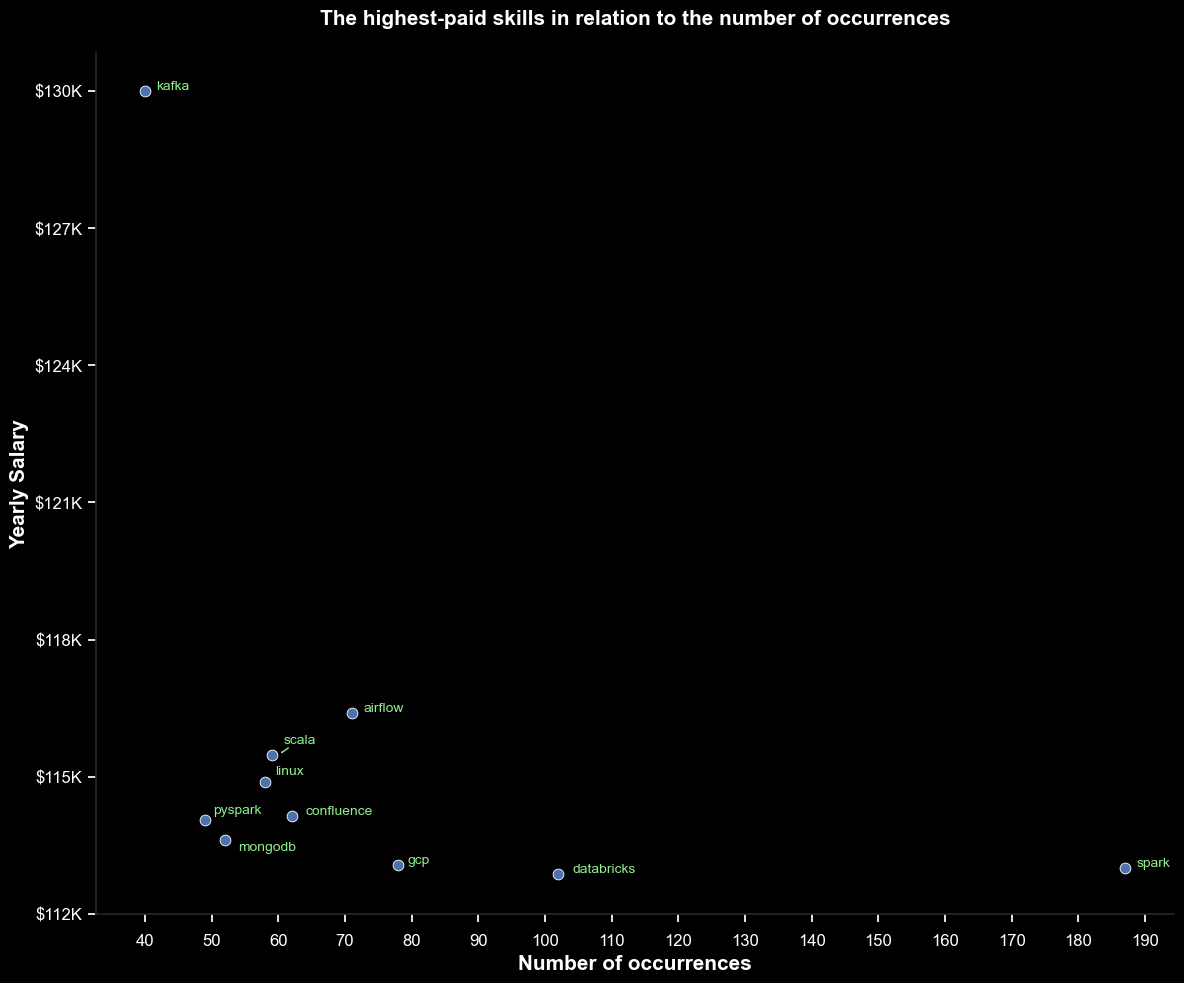

In [85]:
plt.figure(figsize=(12, 10), facecolor="black")
sns.scatterplot(
    data=df_top_10,
    x="total_job_offerts",
    y="avg_salary",
    s=60,
    legend=False
)

sns.despine()
sns.set_theme(style="ticks")

ax = plt.gca()  # Pobierz bieżący obiekt osi
ax.set_facecolor("black")  


ax.tick_params(axis='x', colors='white', labelsize=12)  
ax.tick_params(axis='y', colors='white', labelsize=12)  
ax.xaxis.set_tick_params(pad=8)


# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_top_10.index):
    x = df_top_10['total_job_offerts'].iloc[i]
    y = df_top_10['avg_salary'].iloc[i]
    texts.append(plt.text(x + 1, y - 2, txt, fontsize=10, color='lightgreen', rotation=0))

# Adjust text to avoid overlap
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="lightgreen"))

# Set axis labels, title and legend
plt.xlabel('Number of occurrences', color='white', fontsize=15, fontweight='bold')
plt.ylabel('Yearly Salary', color='white', fontsize=15, fontweight='bold')
plt.title("The highest-paid skills in relation to the number of occurrences", color='white', fontsize=15, fontweight='bold', pad=20)

# Formating x, y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))


ax.set_xticks(range(40, 200, 10))
ax.set_yticks(range(112000, 132000, 3000))

# Adjust layout and display 
plt.tight_layout()
plt.show()